# Multi-Temporal Dynamic Bayesian Networks

In [31]:
import pyAgrum as gum
%load_ext autoreload
%autoreload 2
from DynamicBayesNet import DynamicBayesNet
from notebook import showKTBN, showUnrolled
from notebook import unrollKTBN, showCPT
from notebook import flow, getPosterior, plotFollow


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Building a kTBN

Note the naming convention of variables inside the kTBN. The variables are represented as a tuple, (str, int), with the string being the name of the variable and the int being the timeslice the variable belongs to. *a* for timeslice 2 is represented as ("a", 2).

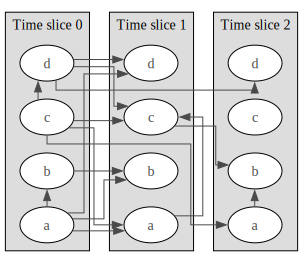

In [32]:
threeDBN = DynamicBayesNet(3)

a = gum.LabelizedVariable("a","a",6)
b = gum.LabelizedVariable("b","b",6)
c = gum.LabelizedVariable("c","c",6)
#d will be added with addFast function

threeDBN.add(a)
threeDBN.add(b)
threeDBN.add(c)
threeDBN.addFast('d{1|3|9}')


threeDBN.addArc(("c", 0), ("d", 0))
threeDBN.addArc(("c", 0), ("a", 1))
threeDBN.addArc(("c", 0), ("c", 1))
threeDBN.addArc(("d", 0), ("c", 1))
threeDBN.addArc(("d", 0), ("d", 1))
threeDBN.addArc(("a", 0), ("a", 1))
threeDBN.addArc(("a", 0), ("d", 1))
threeDBN.addArc(("a", 0), ("b", 1))
threeDBN.addArc(("a", 0), ("b", 0))
threeDBN.addArc(("a", 1), ("c", 1))
threeDBN.addArc(("b", 0), ("b", 1))
threeDBN.addArc(("d", 0), ("d", 2))
threeDBN.addArc(("c", 0), ("a", 2))
threeDBN.addArc(("c", 1), ("b", 2))
threeDBN.addArc(("a", 2), ("b", 2))

showKTBN(threeDBN)


The DBN above is a 3TBN. <br> <br>

We can also generate CPTs and visualize them.

In [33]:
threeDBN.generateCPTs()
showCPT(threeDBN, ("a", 2))

(pyAgrum.Potential@0x10716e740) 
      ||  a,2                                                      |
c,0   ||0        |1        |2        |3        |4        |5        |
------||---------|---------|---------|---------|---------|---------|
0     || 0.4678  | 0.1142  | 0.0301  | 0.0011  | 0.2475  | 0.1392  |
1     || 0.1795  | 0.1746  | 0.2090  | 0.2616  | 0.0732  | 0.1023  |
2     || 0.1173  | 0.1283  | 0.3866  | 0.2968  | 0.0073  | 0.0638  |
3     || 0.1569  | 0.2240  | 0.1138  | 0.1608  | 0.1244  | 0.2201  |
4     || 0.1768  | 0.0286  | 0.1129  | 0.2129  | 0.2186  | 0.2501  |
5     || 0.1359  | 0.1762  | 0.2315  | 0.1842  | 0.0732  | 0.1989  |

## Unrolling kTBN

A kTBN is 'unrolled' and then showed using the kTBN and the unroll size. For $a_0, a_1 ...  a_{k-1}$ in kTBN, the unrolled dBN will include $a_0, a_1 ...  a_{k-1} ...  a_{T-1}$

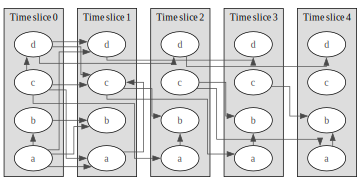

In [34]:
T = 5

dbn = unrollKTBN(threeDBN, T)
showUnrolled(dbn, T)

We can infer on dbn just as on a normal bn. Following the naming convention in kTBN, the variables in a dBN are named using the convention $("a", t)$ where t is the number of their time slice.


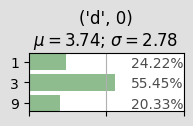
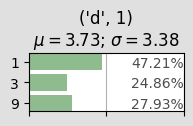
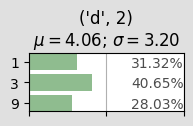
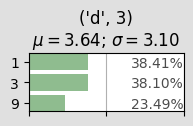
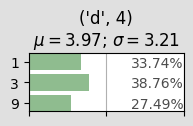

In [ ]:
flow.clear()
for i in range(T):
    flow.add_html(getPosterior(dbn,target=('d', i),evs={}),"P(d,"+str(i)+")")
flow.display()

## Dyanmic Inference: Following Variables

$gdyn.plotFollow$ directly ask for the kTBN, unroll it and add evidence evs. Then it shows the dynamic of variable $a$ for instance by plotting $a_0, a_1  ...  a_{T-1}$
.

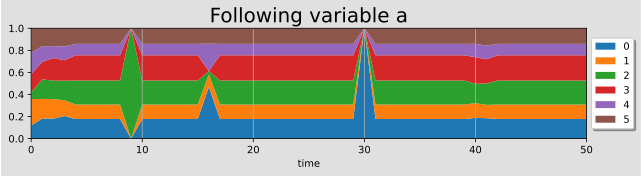

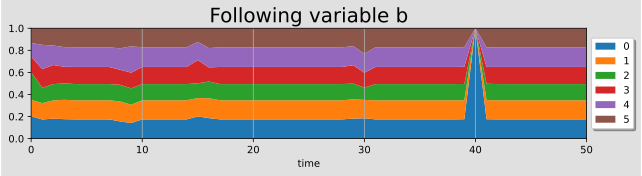

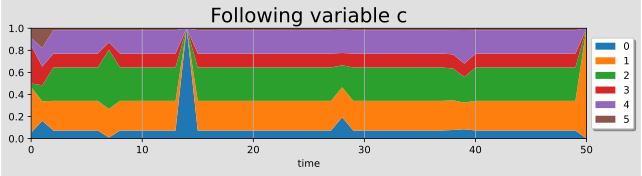

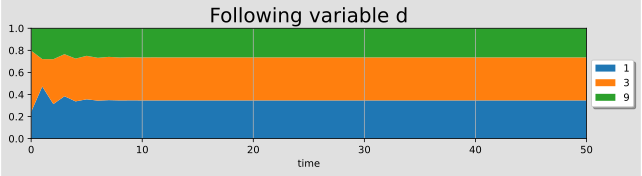

In [36]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 2)
plotFollow(["a","b", "c", "d"], threeDBN, T=51, evs={('a',9):2, ('a',30):0, ('c',14):0, ('b',40):0, ('c',50):1})